In [29]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv(r'C:\Users\KIIT\Desktop\8th sem project\student-por.csv')

# Selecting relevant features including G1 and G2
features = ['G1', 'G2', 'age', 'Medu', 'Fedu', 'studytime', 'failures',
            'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
target = 'G3'

# Encode categorical features if they exist
categorical_features = ['schoolsup', 'famsup', 'higher']
for col in categorical_features:
    if col in df.columns:
        df[col] = df[col].map({'yes': 1, 'no': 0})

X = df[features]
y = df[target]

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Build the improved ANN model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001),
                       input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu',
                       kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu',
                       kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(
    learning_rate=0.001), loss='huber_loss', metrics=['mae'])

# Implement early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=16,
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error on test data: {mae}')

# Function for predicting student performance
def predict_performance(new_data):
    new_data_df = pd.DataFrame([new_data], columns=features)
    new_data_scaled = scaler.transform(new_data_df)
    prediction = model.predict(new_data_scaled)
    return round(prediction[0][0])

# Example prediction with G1 and G2 input
new_student = [14, 15, 18, 4, 4, 2, 0, 3, 3, 1, 1, 5, 4]  # G1=14, G2=15
predicted_score = predict_performance(new_student)
print(f'Predicted Final Grade (G3): {predicted_score}')


Epoch 1/150
33/33 [==============================] - 2s 12ms/step - loss: 9.4267 - mae: 9.7731 - val_loss: 6.1231 - val_mae: 6.4590
Epoch 2/150
33/33 [==============================] - 0s 5ms/step - loss: 3.1746 - mae: 3.4871 - val_loss: 1.8546 - val_mae: 2.1474
Epoch 3/150
33/33 [==============================] - 0s 5ms/step - loss: 2.3176 - mae: 2.6133 - val_loss: 1.5609 - val_mae: 1.8418
Epoch 4/150
33/33 [==============================] - 0s 5ms/step - loss: 2.0618 - mae: 2.3601 - val_loss: 1.5687 - val_mae: 1.8521
Epoch 5/150
33/33 [==============================] - 0s 5ms/step - loss: 2.1327 - mae: 2.4330 - val_loss: 1.5117 - val_mae: 1.8148
Epoch 6/150
33/33 [==============================] - 0s 5ms/step - loss: 2.0137 - mae: 2.3197 - val_loss: 1.3877 - val_mae: 1.6769
Epoch 7/150
33/33 [==============================] - 0s 5ms/step - loss: 2.0467 - mae: 2.3479 - val_loss: 1.3527 - val_mae: 1.6519
Epoch 8/150
33/33 [==============================] - 0s 5ms/step - loss: 1.7753 - 

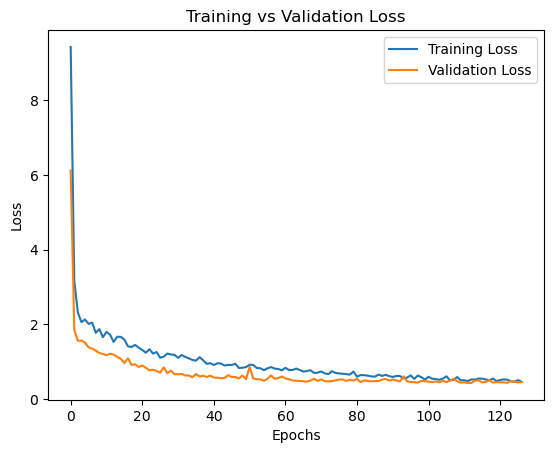

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()